In [1]:
import pandas as pd
import etl_mainfile as etl
from pandas_profiling import ProfileReport
import matplotlib.pyplot as plt

/var/folders/_5/spzfhw090m5dhqvxrw9qgsbr0000gn/T/ipykernel_7012/2023005141.py:3: DeprecationWarning: `import pandas_profiling` is going to be deprecated by April 1st. Please use `import ydata_profiling` instead.
  from pandas_profiling import ProfileReport


In [2]:
#import datasets
df_platform= etl.df_platform
df_ratings= pd.read_csv(r'dataset_ratings.csv')

In [3]:
# Prepare "rating" dataset to merge it with "platform"
df_ratings= df_ratings.rename(columns={"movieId":"show_id","rating":"score"})
df_ratings_filtered= df_ratings.groupby('show_id')['score'].mean()

In [4]:
# merge of both datasets
df_total= pd.merge(df_platform,df_ratings_filtered, on= "show_id")
df_total.head()

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration_int,duration_type,listed_in,description,platform,score
0,as1,movie,the grand seduction,don mckellar,"brendan gleeson, taylor kitsch, gordon pinsent",canada,2021-03-30,2014,g,113,min,"comedy, drama",a small fishing village must procure a local d...,amazon,3.489091
1,as2,movie,take care good night,girish joshi,"mahesh manjrekar, abhay mahajan, sachin khedekar",india,2021-03-30,2018,13+,110,min,"drama, international",a metro family decides to fight a cyber crimin...,amazon,3.592727
2,as3,movie,secrets of deception,josh webber,"tom sizemore, lorenzo lamas, robert lasardo, r...",united states,2021-03-30,2017,g,74,min,"action, drama, suspense",after a man discovers his wife is cheating on ...,amazon,3.546364
3,as4,movie,pink: staying true,sonia anderson,"interviews with: pink, adele, beyoncé, britney...",united states,2021-03-30,2014,g,69,min,documentary,"pink breaks the mold once again, bringing her ...",amazon,3.529545
4,as5,movie,monster maker,giles foster,"harry dean stanton, kieran o'brien, george cos...",united kingdom,2021-03-30,1989,g,45,min,"drama, fantasy",teenage matt banting wants to work with a famo...,amazon,3.410455


**`Platform EDA Analysis`**

In [5]:
df_platform.head()

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration_int,duration_type,listed_in,description,platform
0,as1,movie,the grand seduction,don mckellar,"brendan gleeson, taylor kitsch, gordon pinsent",canada,2021-03-30,2014,g,113,min,"comedy, drama",a small fishing village must procure a local d...,amazon
1,as2,movie,take care good night,girish joshi,"mahesh manjrekar, abhay mahajan, sachin khedekar",india,2021-03-30,2018,13+,110,min,"drama, international",a metro family decides to fight a cyber crimin...,amazon
2,as3,movie,secrets of deception,josh webber,"tom sizemore, lorenzo lamas, robert lasardo, r...",united states,2021-03-30,2017,g,74,min,"action, drama, suspense",after a man discovers his wife is cheating on ...,amazon
3,as4,movie,pink: staying true,sonia anderson,"interviews with: pink, adele, beyoncé, britney...",united states,2021-03-30,2014,g,69,min,documentary,"pink breaks the mold once again, bringing her ...",amazon
4,as5,movie,monster maker,giles foster,"harry dean stanton, kieran o'brien, george cos...",united kingdom,2021-03-30,1989,g,45,min,"drama, fantasy",teenage matt banting wants to work with a famo...,amazon


In [6]:
df_platform.shape

(22998, 14)

In [7]:
df_platform.describe()

,release_year
count,22998.000000
mean,2010.811244
std,15.401142
min,1920.000000
25%,2010.000000
50%,2016.000000
75%,2019.000000
max,2021.000000


In [8]:
df_platform.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 22998 entries, 0 to 8806
Data columns (total 14 columns):
 #   Column         Non-Null Count  Dtype         
---  ------         --------------  -----         
 0   show_id        22998 non-null  object        
 1   type           22998 non-null  object        
 2   title          22998 non-null  object        
 3   director       14739 non-null  object        
 4   cast           17677 non-null  object        
 5   country        11499 non-null  object        
 6   date_added     13444 non-null  datetime64[ns]
 7   release_year   22998 non-null  int64         
 8   rating         22998 non-null  object        
 9   duration_int   22516 non-null  object        
 10  duration_type  22516 non-null  object        
 11  listed_in      22998 non-null  object        
 12  description    22994 non-null  object        
 13  platform       22998 non-null  object        
dtypes: datetime64[ns](1), int64(1), object(12)
memory usage: 2.6+ MB


In [9]:
df_platform.dtypes

show_id                  object
type                     object
title                    object
director                 object
cast                     object
country                  object
date_added       datetime64[ns]
release_year              int64
rating                   object
duration_int             object
duration_type            object
listed_in                object
description              object
platform                 object
dtype: object

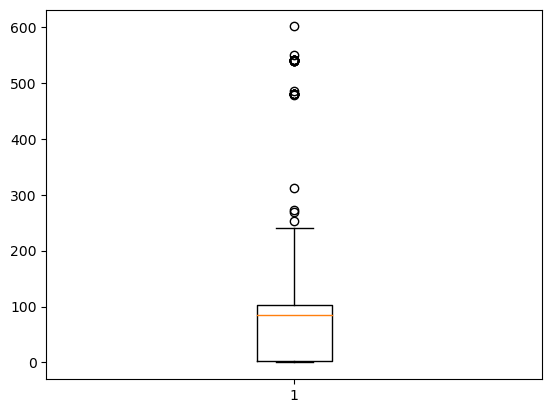

In [10]:
int_values= df_platform['duration_int'].dropna().astype(float)
plt.boxplot(int_values)
plt.show()

In [11]:
ProfileReport(df_platform,title= 'Platform EDA Analysis',html= {'style':{'full_width':True}})

Summarize dataset:   0%|          | 0/5 [00:00<?, ?it/s]

Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

In [12]:
df_platform[df_platform['duration_int'] == '601']

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration_int,duration_type,listed_in,description,platform
933,as934,movie,soothing surf at del norte for sleep black screen,mark knight,NaN,NaN,NaT,2018,all,601,min,special interest,black screen reduces the blue-spectrum light w...,amazon


**`Ratings EDA Analysis`**

In [13]:
df_ratings.head()

,show_id,year,score,platform
0,as1,1996,3.29,amazon
1,as1,1997,3.00,amazon
2,as1,1998,4.17,amazon
3,as1,1999,3.86,amazon
4,as1,2000,3.90,amazon


In [14]:
df_ratings.shape

(505909, 4)

In [15]:
df_ratings.describe()

,year,score
count,505909.000000,505909.000000
mean,2006.500766,3.536249
std,6.344098,0.265681
min,1995.000000,0.500000
25%,2001.000000,3.380000
50%,2007.000000,3.540000
75%,2012.000000,3.700000
max,2017.000000,5.000000


In [16]:
df_ratings.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 505909 entries, 0 to 505908
Data columns (total 4 columns):
 #   Column    Non-Null Count   Dtype  
---  ------    --------------   -----  
 0   show_id   505909 non-null  object 
 1   year      505909 non-null  int64  
 2   score     505909 non-null  float64
 3   platform  505909 non-null  object 
dtypes: float64(1), int64(1), object(2)
memory usage: 15.4+ MB


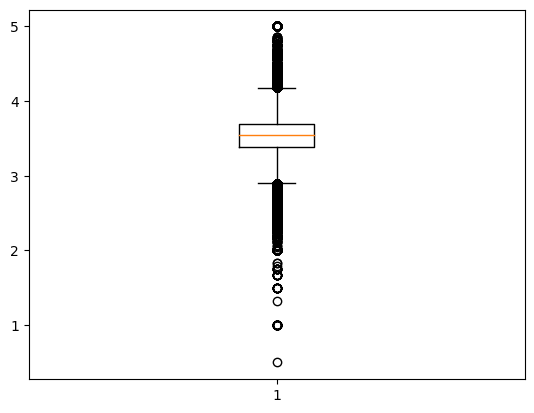

In [17]:
notnulldf9= df_ratings['score'].dropna().astype(float)
plt.boxplot(notnulldf9)
plt.show()

In [18]:
ProfileReport(df_ratings, title= 'Rating EDA Analysis', html= {'style':{'full_width':True}})

Summarize dataset:   0%|          | 0/5 [00:00<?, ?it/s]

Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

In [19]:
df_ratings[df_ratings['score']== 0.5]

,show_id,year,score,platform
206644,as9453,2013,0.5,amazon


In [20]:
df_platform[df_platform['show_id']=='as9453']

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration_int,duration_type,listed_in,description,platform
9452,as9453,movie,filth,jon s. baird,"james mcavoy, imogen poots, jamie bell",NaN,NaT,2014,r,98,min,"arthouse, comedy, drama","while working on a murder case, a scheming, ma...",amazon
